In [ ]:
import pandas as pd 
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 

from fastai.tabular.all import * 
# from fastai.metrics import FocalLossFlat, DiceLoss 
from fastai.losses import DiceLoss, FocalLossFlat 
from sklearn.metrics import f1_score 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import ComplementNB 
from lazypredict.Supervised import LazyClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.semi_supervised import SelfTrainingClassifier
import warnings
from lazypredict.Supervised import LazyClassifier 
# pd.set_option('display.max_columns', None)

from sklearn.linear_model import RidgeClassifierCV
from sklearn.naive_bayes import ComplementNB

from sklearn.calibration import CalibratedClassifierCV

from fastai.metrics import Metric
from fastai.torch_core import Tensor
import torch
import numpy as np

from bayes_opt import BayesianOptimization
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
import numpy as np
from sklearn.metrics import make_scorer, f1_score

In [2]:
df_pyre = pd.read_csv('nilearn_800FULL_TRAINING.csv')
# df_pyre.drop(columns=['column000'], axis=1, inplace=True)
df_pyre_test = pd.read_csv('NILEARN_800TESTING_ADHD.csv')
df_pyre_test.drop(columns='Unnamed: 0', axis=1 , inplace=True)
df_pyre.head()

,participant_id,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA793,PCA794,PCA795,PCA796,PCA797,PCA798,PCA799,PCA800,ADHD_Outcome,Sex_F
0,WHWymJu6zNZi,2.01,0.10,0.03,-0.10,0.59,-1.33,-0.66,-0.87,-0.08,...,0.15,0.52,0.24,-0.13,0.67,0.02,-0.17,-0.42,1,1
1,4PAQp1M6EyAo,1.45,1.34,1.02,-0.75,-0.45,0.30,0.27,0.83,0.23,...,-0.76,-0.55,-0.26,-0.49,-0.30,-0.10,0.82,-0.57,1,1
2,obEacy4Of68I,-2.37,-0.65,0.82,-0.78,0.45,-0.91,0.34,0.41,0.67,...,0.11,0.14,0.13,-0.34,-0.39,-0.47,0.32,0.94,1,1
3,s7WzzDcmDOhF,0.53,0.77,0.61,-0.53,1.21,-0.72,-0.41,-0.46,-0.23,...,0.13,0.08,0.08,-0.16,0.12,0.10,0.04,-0.07,1,1
4,sId1cQF5F22m,-0.19,-1.88,-0.82,0.65,0.98,-1.61,-0.15,-2.08,-0.28,...,-0.39,0.24,-0.12,-0.10,0.38,-0.14,0.12,0.06,0,0


In [3]:
df_pyre_test.head()

,participant_id,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA791,PCA792,PCA793,PCA794,PCA795,PCA796,PCA797,PCA798,PCA799,PCA800
0,Cfwaf5FX7jWK,1.18,-0.85,0.84,0.14,-0.37,0.06,-0.87,0.11,-0.11,...,0.12,-0.01,0.01,-0.08,-0.13,0.04,-0.01,0.04,-0.13,0.14
1,vhGrzmvA3Hjq,0.01,0.05,0.41,0.39,-0.65,-0.56,0.95,0.55,-0.57,...,-0.16,0.06,-0.08,-0.07,0.11,-0.20,-0.09,-0.15,-0.02,-0.10
2,ULliyEXjy4OV,0.07,-0.55,-0.80,-0.56,-0.43,-0.32,0.10,-0.43,0.08,...,0.06,0.07,-0.10,-0.15,-0.03,0.08,-0.18,0.00,-0.26,0.16
3,LZfeAb1xMtql,0.64,-1.06,0.69,-0.46,-1.51,0.36,-0.13,-0.77,0.18,...,-0.01,0.07,-0.05,-0.01,-0.11,0.02,0.10,-0.03,0.13,-0.17
4,EnFOUv0YK1RG,1.74,0.51,1.01,-0.33,-0.19,0.06,-0.12,0.37,0.15,...,0.32,0.11,-0.04,0.07,-0.18,0.13,-0.34,0.11,0.27,-0.08


In [7]:
df_pyre = df_pyre.drop(columns=['ADHD_Outcome', 'Sex_F'], axis=1)

# df_pyre["is_test"] = 0 
# df_pyre_test["is_test"] = 1

### *`LogisticRegression Model`*

In [2]:
train_df = pd.read_csv("full_nilearn_800FULL_TRAINING.csv")  
test_df = pd.read_csv("full_nilearn_800FULL_TEST.csv")
test_df.drop(columns='Unnamed: 0', axis=1 , inplace=True)
train_df.drop(columns='Unnamed: 0', axis=1 , inplace=True)
# test_participants_id = test_df['participant_id']

In [3]:
train_df.head()

,participant_id,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA797,PCA798,PCA799,PCA800,ADHD_Outcome,Sex_F,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Externalizing,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Generating_Impact
0,WHWymJu6zNZi,2.01,0.10,0.03,-0.10,0.59,-1.33,-0.66,-0.87,-0.08,...,0.67,0.02,-0.17,-0.42,1,1,NaN,NaN,NaN,NaN
1,4PAQp1M6EyAo,1.45,1.34,1.02,-0.75,-0.45,0.30,0.27,0.83,0.23,...,-0.30,-0.10,0.82,-0.57,1,1,9.00,17.00,26.00,8.00
2,obEacy4Of68I,-2.37,-0.65,0.82,-0.78,0.45,-0.91,0.34,0.41,0.67,...,-0.39,-0.47,0.32,0.94,1,1,4.00,4.00,7.00,1.00
3,s7WzzDcmDOhF,0.53,0.77,0.61,-0.53,1.21,-0.72,-0.41,-0.46,-0.23,...,0.12,0.10,0.04,-0.07,1,1,3.00,6.00,14.00,3.00
4,sId1cQF5F22m,-0.19,-1.88,-0.82,0.65,0.98,-1.61,-0.15,-2.08,-0.28,...,0.38,-0.14,0.12,0.06,0,0,4.00,8.00,17.00,2.00


In [4]:
train_df[['Sex_F']].value_counts()
# train_df['ADHD_Outcome'].value_counts()

Sex_F
0        797
1        416
Name: count, dtype: int64

In [5]:
sdq_columns = [
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Generating_Impact'
]

# Initialize imputer (using only SDQ features)
imputer = IterativeImputer(random_state=42, max_iter=10)

# Impute missing values in training data
train_df[sdq_columns] = imputer.fit_transform(train_df[sdq_columns])

# Impute missing values in test data (using trained imputer)
if set(sdq_columns).issubset(test_df.columns):
    test_df[sdq_columns] = imputer.transform(test_df[sdq_columns])

# Dictionary to store binning thresholds for each SDQ column
binning_info = {}

for col in sdq_columns:
    # Prepare data - no need to fill NAs anymore as we've imputed them
    temp_df = train_df.copy()
    
    if len(temp_df) >= 30:  # Need at least 30 samples (3 leaves * min_samples_leaf)
        # Train decision tree
        tree = DecisionTreeClassifier(
            max_leaf_nodes=3,
            min_samples_leaf=10,
            random_state=42
        )
        tree.fit(temp_df[[col]], temp_df['ADHD_Outcome'])
        
        # Extract the decision thresholds (sorted)
        thresholds = sorted([t for t in tree.tree_.threshold if t != -2])
        
        # Store binning info
        binning_info[col] = {
            'thresholds': thresholds,
            'min_value': temp_df[col].min(),
            'max_value': temp_df[col].max(),
            'imputed_count': sum(train_df[col].isna())  # Track how many values were imputed
        }
        
        # Vectorized binning using pandas cut
        if len(thresholds) == 1:
            bins = [-np.inf, thresholds[0], np.inf]
            labels = ['low', 'high']
        else:
            bins = [-np.inf, thresholds[0], thresholds[1], np.inf]
            labels = ['low', 'medium', 'high']
        
        # Apply to training data
        train_df[f'{col}_category'] = pd.cut(
            train_df[col],
            bins=bins,
            labels=labels,
            include_lowest=True
        )
        
        # Apply same binning to test data
        if col in test_df.columns:
            test_df[f'{col}_category'] = pd.cut(
                test_df[col],
                bins=bins,
                labels=labels,
                include_lowest=True
            )
    else:
        print(f"Not enough data for column {col} - {len(temp_df)} samples available")
        binning_info[col] = None


In [6]:
category_order = ['low', 'medium', 'high']
for col in sdq_columns:
    if f'{col}_category' in train_df.columns:
        train_df[f'{col}_category'] = pd.Categorical(
            train_df[f'{col}_category'],
            categories=category_order[:len(train_df[f'{col}_category'].cat.categories)],
            ordered=True
        )
    if f'{col}_category' in test_df.columns:
        test_df[f'{col}_category'] = pd.Categorical(
            test_df[f'{col}_category'],
            categories=category_order[:len(test_df[f'{col}_category'].cat.categories)],
            ordered=True
        )


In [7]:
category_map = {'low': 0, 'medium': 1, 'high': 2}
for col in sdq_columns:
    if f'{col}_category' in train_df.columns:
        train_df[f'{col}_ordinal'] = train_df[f'{col}_category'].map(category_map)
        if col in test_df.columns:
            test_df[f'{col}_ordinal'] = test_df[f'{col}_category'].map(category_map)

In [8]:
print("Binning thresholds with imputation details:")
for col, info in binning_info.items():
    if info is not None:
        print(f"\n{col}:")
        print(f"  Values imputed: {info['imputed_count']} ({info['imputed_count']/len(train_df):.1%})")
        print(f"  Value range: [{info['min_value']:.2f}, {info['max_value']:.2f}]")
        if len(info['thresholds']) == 1:
            print(f"  Low: ≤ {info['thresholds'][0]:.2f}")
            print(f"  High: > {info['thresholds'][0]:.2f}")
        else:
            print(f"  Low: ≤ {info['thresholds'][0]:.2f}")
            print(f"  Medium: ≤ {info['thresholds'][1]:.2f}")
            print(f"  High: > {info['thresholds'][1]:.2f}")
        
        # Show distribution of categories
        print("\n  Category distribution:")
        print(train_df[f'{col}_category'].value_counts().sort_index())

Binning thresholds with imputation details:

SDQ_SDQ_Hyperactivity:
  Values imputed: 0 (0.0%)
  Value range: [0.00, 10.00]
  Low: ≤ 3.50
  Medium: ≤ 5.77
  High: > 5.77

  Category distribution:
SDQ_SDQ_Hyperactivity_category
low       292
medium    314
high      607
Name: count, dtype: int64

SDQ_SDQ_Externalizing:
  Values imputed: 0 (0.0%)
  Value range: [0.00, 20.00]
  Low: ≤ 4.50
  Medium: ≤ 7.81
  High: > 7.81

  Category distribution:
SDQ_SDQ_Externalizing_category
low       296
medium    311
high      606
Name: count, dtype: int64

SDQ_SDQ_Difficulties_Total:
  Values imputed: 0 (0.0%)
  Value range: [0.00, 34.00]
  Low: ≤ 7.50
  Medium: ≤ 13.50
  High: > 13.50

  Category distribution:
SDQ_SDQ_Difficulties_Total_category
low       318
medium    399
high      496
Name: count, dtype: int64

SDQ_SDQ_Generating_Impact:
  Values imputed: 0 (0.0%)
  Value range: [0.00, 10.00]
  Low: ≤ 0.50
  Medium: ≤ 3.50
  High: > 3.50

  Category distribution:
SDQ_SDQ_Generating_Impact_category


In [9]:
train_df.drop(columns=['SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Hyperactivity_category',
                        'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Externalizing_category',
                        'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Difficulties_Total_category',
                        'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Generating_Impact_category',   
    ], inplace=True)

In [10]:
train_df.head()

,participant_id,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA797,PCA798,PCA799,PCA800,ADHD_Outcome,Sex_F,SDQ_SDQ_Hyperactivity_ordinal,SDQ_SDQ_Externalizing_ordinal,SDQ_SDQ_Difficulties_Total_ordinal,SDQ_SDQ_Generating_Impact_ordinal
0,WHWymJu6zNZi,2.01,0.10,0.03,-0.10,0.59,-1.33,-0.66,-0.87,-0.08,...,0.67,0.02,-0.17,-0.42,1,1,1,1,1,2
1,4PAQp1M6EyAo,1.45,1.34,1.02,-0.75,-0.45,0.30,0.27,0.83,0.23,...,-0.30,-0.10,0.82,-0.57,1,1,2,2,2,2
2,obEacy4Of68I,-2.37,-0.65,0.82,-0.78,0.45,-0.91,0.34,0.41,0.67,...,-0.39,-0.47,0.32,0.94,1,1,1,0,0,1
3,s7WzzDcmDOhF,0.53,0.77,0.61,-0.53,1.21,-0.72,-0.41,-0.46,-0.23,...,0.12,0.10,0.04,-0.07,1,1,0,1,2,1
4,sId1cQF5F22m,-0.19,-1.88,-0.82,0.65,0.98,-1.61,-0.15,-2.08,-0.28,...,0.38,-0.14,0.12,0.06,0,0,1,2,2,1


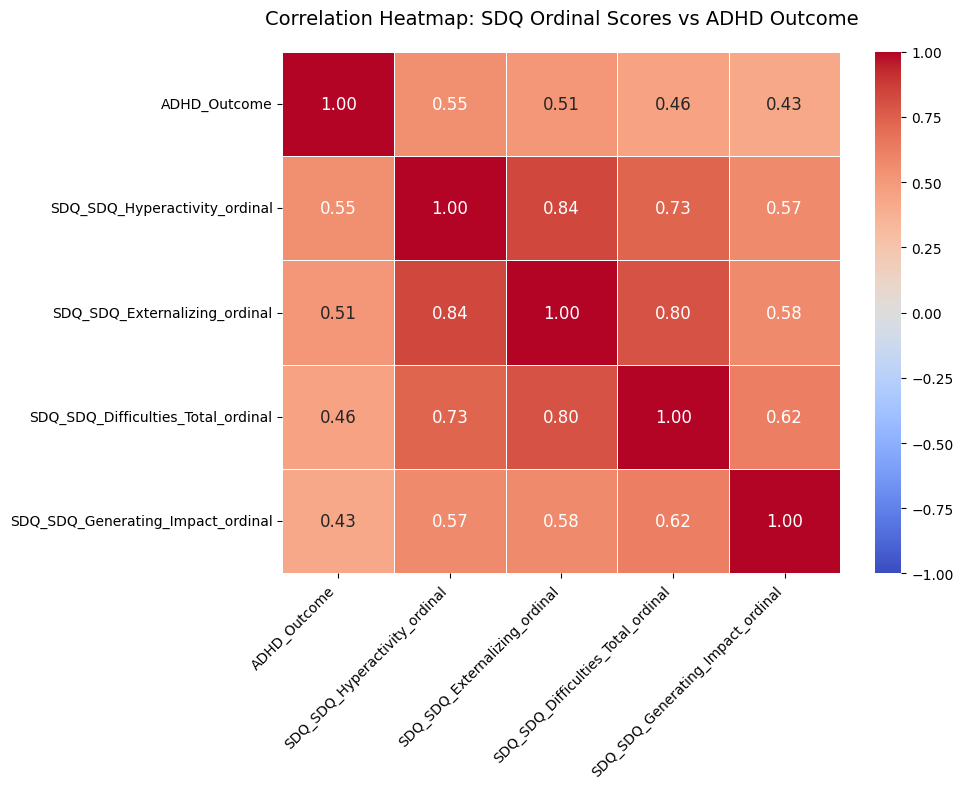

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Select the relevant columns
heatmap_data = train_df[['ADHD_Outcome', 
                        'SDQ_SDQ_Hyperactivity_ordinal',
                        'SDQ_SDQ_Externalizing_ordinal',
                        'SDQ_SDQ_Difficulties_Total_ordinal',
                        'SDQ_SDQ_Generating_Impact_ordinal']]


corr_matrix = heatmap_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            center=0,
            linewidths=.5,
            fmt=".2f",
            annot_kws={"size": 12})

plt.title('Correlation Heatmap: SDQ Ordinal Scores vs ADHD Outcome', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [12]:
test_df.drop(columns=['SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Hyperactivity_category', 'Unnamed: 0.1',
                        'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Externalizing_category',
                        'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Difficulties_Total_category',
                        'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Generating_Impact_category',   
    ], inplace=True)

In [13]:
test_participant_ids = test_df["participant_id"]

y_train_adhd = train_df['ADHD_Outcome']
y_train_sex = train_df['Sex_F']
X_train = train_df.drop(columns=['ADHD_Outcome', 'Sex_F', 'participant_id'])
X_test = test_df.drop(columns=['participant_id'])

In [29]:
from sklearn.model_selection import train_test_split

y = train_df['Sex_F']
X = train_df.drop(columns=['ADHD_Outcome', 'Sex_F', 'participant_id'], axis=1)

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#### `Bayes optimization for sex target`

In [30]:
#Test startified kfold 
# Define a custom F1 scorer to ensure proper averaging for binary/multiclass
# f1_scorer = make_scorer(f1_score, average='weighted')  # or 'binary' if strictly two-class
from sklearn.metrics import make_scorer, fbeta_score

# f1_scorer = make_scorer(f1_score, average='macro')  # or 'binary' if strictly two-class
f1_scorer = make_scorer(fbeta_score, beta=1, average='weighted', pos_label=1)

def objective(C, max_iter, class_weight_choice, penalty_choice, solver_choice, l1_ratio=None):
    class_weight_options = [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, 
                          {0: 1, 1: 4}, {0: 1, 1: 5}]
    penalty_options = ['l1', 'l2', 'elasticnet']
    solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    
    class_weight = class_weight_options[int(class_weight_choice)]
    penalty = penalty_options[int(penalty_choice)]
    solver = solver_options[int(solver_choice)]
    
    # Handle incompatible parameter combinations
    invalid_combinations = [
        (penalty == 'l1' and solver not in ['liblinear', 'saga']),
        (penalty == 'elasticnet' and solver != 'saga'),
        (penalty == 'l2' and solver == 'liblinear' and l1_ratio is not None),
        (penalty in ['l1', 'l2'] and l1_ratio is not None)
    ]
    
    if any(invalid_combinations):
        return 0  # Return minimum score for invalid combinations
    
    params = {
        'C': 10**C,  # Search on log scale
        'max_iter': int(max_iter),
        'class_weight': class_weight,
        'penalty': penalty,
        'solver': solver,
        'random_state': 42
    }
    
    if penalty == 'elasticnet':
        params['l1_ratio'] = l1_ratio
    
    model = LogisticRegression(**params)
    
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=42, n_repeats=4)
    try:
        scores = cross_val_score(model, X, y, cv=cv, scoring=f1_scorer, n_jobs=-1)
        return np.mean(scores)
    except:
        return 0  


pbounds = {
    'C': (-4, 2),  
    'max_iter': (200, 300),
    'class_weight_choice': (0, 5.999),  
    'penalty_choice': (0, 2.999),     
    'solver_choice': (0, 4.999),       
    'l1_ratio': (0.1, 0.9)             
}

# Run optimization
optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=15, n_iter=50)  # More iterations for complex space


best_params = optimizer.max['params']
best_params['C'] = 10**best_params['C']  # Convert back from log scale

#Convert categorical choices 
class_weight_options = [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, 
                       {0: 1, 1: 4}, {0: 1, 1: 5}]
penalty_options = ['l1', 'l2', 'elasticnet']
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

best_params['class_weight'] = class_weight_options[int(best_params.pop('class_weight_choice'))]
best_params['penalty'] = penalty_options[int(best_params.pop('penalty_choice'))]
best_params['solver'] = solver_options[int(best_params.pop('solver_choice'))]

if best_params['penalty'] != 'elasticnet':
    best_params.pop('l1_ratio', None)

print("Optimized Parameters for F1 Score:")
print(best_params)
print(f"Best F1 Score: {optimizer.max['target']:.4f}")

|   iter    |  target   |     C     | class_... | l1_ratio  | max_iter  | penalt... | solver... |
-------------------------------------------------------------------------------------------------
| 1         | 0.0       | -1.753    | 5.703     | 0.6856    | 259.9     | 0.4679    | 0.7798    |
| 2         | 0.0       | -3.651    | 5.196     | 0.5809    | 270.8     | 0.06173   | 4.849     |
| 3         | 0.0       | 0.9947    | 1.274     | 0.2455    | 218.3     | 0.9124    | 2.623     |
| 4         | 0.0       | -1.408    | 1.747     | 0.5895    | 213.9     | 0.8761    | 1.831     |
| 5         | 0.0       | -1.264    | 4.71      | 0.2597    | 251.4     | 1.777     | 0.2322    |
| 6         | 0.7564    | -0.3547   | 1.023     | 0.152     | 294.9     | 2.896     | 4.041     |
| 7         | 0.0       | -2.172    | 0.5859    | 0.6474    | 244.0     | 0.366     | 2.475     |
| 8         | 0.0       | -3.794    | 5.455     | 0.307     | 266.3     | 0.9348    | 2.6       |
| 9         | 0.7814

#### `Bayes optimization for the ADHD Outcome target`

In [23]:
#Test startified kfold 

# Define a custom F1 scorer to ensure proper averaging for binary/multiclass
from sklearn.metrics import make_scorer, fbeta_score

# f1_scorer = make_scorer(f1_score, average='macro')  # or 'binary' if strictly two-class
f1_scorer = make_scorer(fbeta_score, beta=2, average='weighted', pos_label=1)

def objective(C, max_iter, class_weight_choice, penalty_choice, solver_choice, l1_ratio=None):
    class_weight_options = [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, 
                          {0: 1, 1: 4}, {0: 1, 1: 5}]
    penalty_options = ['l1', 'l2', 'elasticnet']
    solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    
    class_weight = class_weight_options[int(class_weight_choice)]
    penalty = penalty_options[int(penalty_choice)]
    solver = solver_options[int(solver_choice)]
    
    # Handle incompatible parameter combinations
    invalid_combinations = [
        (penalty == 'l1' and solver not in ['liblinear', 'saga']),
        (penalty == 'elasticnet' and solver != 'saga'),
        (penalty == 'l2' and solver == 'liblinear' and l1_ratio is not None),
        (penalty in ['l1', 'l2'] and l1_ratio is not None)
    ]
    
    if any(invalid_combinations):
        return 0  
    
    params = {
        'C': 10**C,  
        'max_iter': int(max_iter),
        'class_weight': class_weight,
        'penalty': penalty,
        'solver': solver,
        'random_state': 42
    }
    
    if penalty == 'elasticnet':
        params['l1_ratio'] = l1_ratio
    
    model = LogisticRegression(**params)
    
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=42, n_repeats=4)
    try:
        scores = cross_val_score(model, X, y, cv=cv, scoring=f1_scorer, n_jobs=-1)
        return np.mean(scores)
    except:
        return 0  

# Define parameter bounds
pbounds = {
    'C': (-4, 2),  # 10^-4 to 10^2
    'max_iter': (200, 300),
    'class_weight_choice': (0, 5.999),  # 6 options
    'penalty_choice': (0, 2.999),      # 3 options
    'solver_choice': (0, 4.999),       # 5 options
    'l1_ratio': (0.1, 0.9)             # Only used for elasticnet
}

# Run optimization
optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=15, n_iter=50)  # More iterations for complex space

# Process best parameters
best_params = optimizer.max['params']
best_params['C'] = 10**best_params['C']  # Convert back from log scale

# Convert categorical choices
class_weight_options = [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, 
                       {0: 1, 1: 4}, {0: 1, 1: 5}]
penalty_options = ['l1', 'l2', 'elasticnet']
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

best_params['class_weight'] = class_weight_options[int(best_params.pop('class_weight_choice'))]
best_params['penalty'] = penalty_options[int(best_params.pop('penalty_choice'))]
best_params['solver'] = solver_options[int(best_params.pop('solver_choice'))]

# Remove l1_ratio if not using elasticnet
if best_params['penalty'] != 'elasticnet':
    best_params.pop('l1_ratio', None)

print("Optimized Parameters for F1 Score:")
print(best_params)
print(f"Best F1 Score: {optimizer.max['target']:.4f}")

|   iter    |  target   |     C     | class_... | l1_ratio  | max_iter  | penalt... | solver... |
-------------------------------------------------------------------------------------------------
| 1         | 0.0       | -1.753    | 5.703     | 0.6856    | 259.9     | 0.4679    | 0.7798    |
| 2         | 0.0       | -3.651    | 5.196     | 0.5809    | 270.8     | 0.06173   | 4.849     |
| 3         | 0.0       | 0.9947    | 1.274     | 0.2455    | 218.3     | 0.9124    | 2.623     |
| 4         | 0.0       | -1.408    | 1.747     | 0.5895    | 213.9     | 0.8761    | 1.831     |
| 5         | 0.0       | -1.264    | 4.71      | 0.2597    | 251.4     | 1.777     | 0.2322    |
| 6         | 0.7347    | -0.3547   | 1.023     | 0.152     | 294.9     | 2.896     | 4.041     |
| 7         | 0.0       | -2.172    | 0.5859    | 0.6474    | 244.0     | 0.366     | 2.475     |
| 8         | 0.0       | -3.794    | 5.455     | 0.307     | 266.3     | 0.9348    | 2.6       |
| 9         | 0.7618

In [14]:
# weight={0: 1, 1: 5}  
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import TunedThresholdClassifierCV


cv_model = RepeatedStratifiedKFold(n_splits=5, n_repeats=6, random_state=42)

weight={0: 1, 1: 2} 
# clf_adhd = LogisticRegression(solver='saga',penalty='elasticnet', class_weight=weight, max_iter=209, random_state=42, C=0.0895,l1_ratio=0.4354)
# clf_adhd.fit(X_train, y_train_adhd) 
clf_adhd = LogisticRegression(solver='saga',penalty='elasticnet', class_weight=None, max_iter=276, random_state=42, C=0.0228,l1_ratio=0.5192)
clf_adhd.fit(X_train, y_train_adhd)
 

# clf_adhd = LogisticRegressionCV(solver='saga', cv=cv_model,penalty='elasticnet', scoring='f1', class_weight='balanced', max_iter=278, 
#                                 random_state=42, Cs=[0.19066], l1_ratios=[0.87567])
# clf_adhd.fit(X_train, y_train_adhd) 

LogisticRegression(C=0.0228, l1_ratio=0.5192, max_iter=276,
                   penalty='elasticnet', random_state=42, solver='saga')

In [15]:
y_probs = clf_adhd.predict_proba(X_test)[:, 1]
# y_probs
avg_probs = np.mean(y_probs)
avg_probs

0.6820447623574517

In [16]:
# precision_class_0 = make_scorer(f1_score, pos_label=0)
# tuned_clf = TunedThresholdClassifierCV(estimator=clf_adhd, scoring=precision_class_0, cv=cv_model).fit(X_train, y_train_adhd)
# print("Best threshold found:", tuned_clf.best_threshold_)


In [17]:

# clf_sex = LogisticRegression(solver='saga',penalty='elasticnet', class_weight='balanced', max_iter=295,
#                                 random_state=42, C=0.04135,
#                                l1_ratio=0.18467)
# clf_sex.fit(X_train, y_train_sex) 
clf_sex = LogisticRegression(solver='saga',penalty='elasticnet', class_weight='balanced', max_iter=295,
                                random_state=42, C=0.04135,
                               l1_ratio=0.18467)
clf_sex.fit(X_train, y_train_sex)

LogisticRegression(C=0.04135, class_weight='balanced', l1_ratio=0.18467,
                   max_iter=295, penalty='elasticnet', random_state=42,
                   solver='saga')

In [18]:
y_probs2 = clf_sex.predict_proba(X_test)[:, 1]
# y_probs
avg_probs2 = np.mean(y_probs2)
avg_probs2 

0.4034296090063531

In [19]:
# Final Predictions on Test Set
final_pred_adhd = clf_adhd.predict(X_test)
final_pred_sex = clf_sex.predict(X_test)

In [20]:
# y_pred_probs_adhd = clf_adhd.predict_proba(X_test)[:, 1]
# # y_pred_probs_sex = clf_sex.predict_proba(X_test)[:, 1]
# final_pred_adhd2 = (y_pred_probs_adhd > 0.3).astype(int)

In [21]:
submission = pd.DataFrame({
    "participant_id": test_participant_ids,
    "ADHD_Outcome": final_pred_adhd,
    "Sex_F": final_pred_sex
})

submission.to_csv("2Full_LogisticRegression2.csv", index=False)
